# Multi armed bandits algorithm - demo

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch as th
from simulator.population_model import PopulationModel
from simulator.multi_armed_bandits import EpsilonGreedy, UCB, simulate, orders_and_rate_per_day
from simulator.plotting import plot_average_rewards


### Load the population model with 0.8% buy rate

In [3]:
pop_model = PopulationModel.init()
# load the pretrained weights for a population model that had 0.8% buy rate
pop_model.load_weights("weights_population_model_0.8_ratio.pth")

## MAB algorithms

The multi-armed bandit problem is a decision-making problem where an agent must choose between multiple actions (arms), each with unknown rewards, to maximize the total reward over time. In this case, the arms are discount levels that some clients see and the reward can be the number of orders, the buy rate, or profit. We implement Epsilon-Greedy and UCB and compare them with a random scenario.

- **Epsilon-Greedy**: Balances exploration and exploitation by choosing a random discount with probability $\epsilon$ and the best-known discount until that stept with probability $1-\epsilon$. 
- **UCB (Upper Confidence Bound)**: Exploits arms (discounts) with the highest average reward while exploring arms with high uncertainty by factoring in the number of times an arm is chosen.
- **Random Strategy**: Selects discounts randomly from the given list at each update step.







For plotting the rewards we use plot_average_rewards() function with the following parameters:
- **population_model**: the population model from which we sample agents at each step
- **n_days**: the timeframe on which we analyze the model. We can consider as step days, weeks, months, etc. A different step indicates a new discount the clients see
- **epsilons**: parameters for the epsilon-greedy algorithm, represent the degrees of exploration we test
- **confidences**: the confidence level for UCB, also reffers to a degree of exploration
- **num_runs**: the number of runs for each step, from which we extract the mean rewards (to minimize noise)
- **discounts**: the discounts level from which the model should choose the optimial one
- **reward**: the type of reward that we prioritize in the algorithms; it can be 'orders', 'rate' (buy rate in the specified timeframe), 'profit' 
- **product_price**: the price for the product we test the algorithm on; it is used for the 'profit' reward; default=300
- **plot_path_file**: the path of the file in each we save the obtained plot with the evolution of the mean reward over time


The function returns the evolution of rewards at each step, the values and counts for each arm in the MAB problem for the algorithms used in the current session. This function can either compute the rewards plot for Epsilon-Greedy, for UCB compared with the random strategy, or all three.

### Epsilon Greedy - maximize profit, 360 days, discount=30-80%

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [01:31<00:00,  3.06s/it]


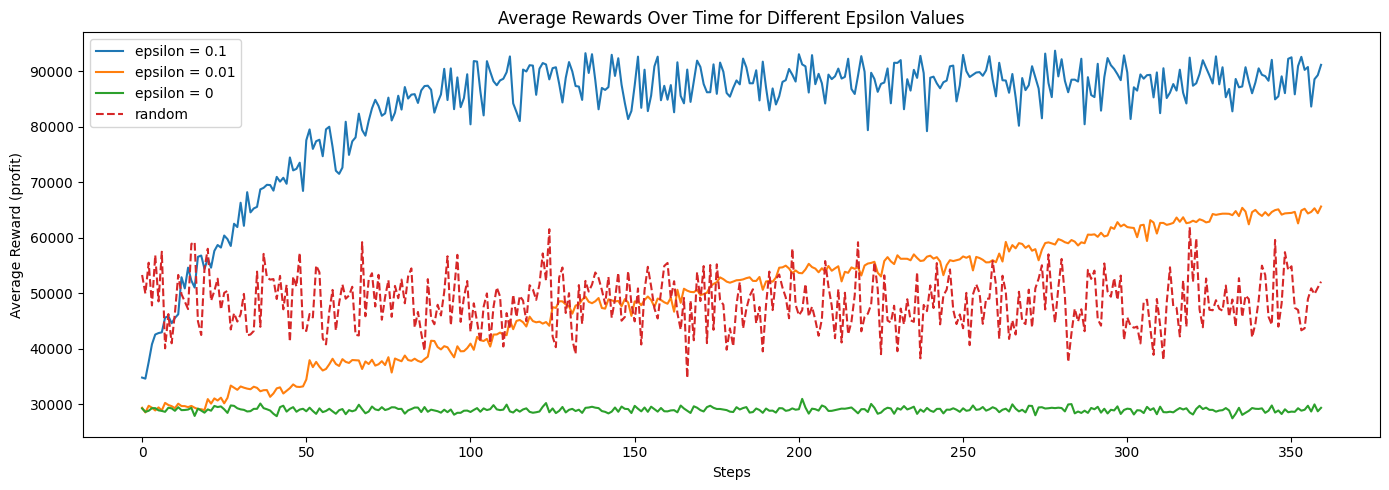

In [4]:
agents = pop_model.sample_without_discount(N=20000)

features = plot_average_rewards(pop_model, same_agents=True, agents=agents, \
                                n_days=360, epsilons=[0.1, 0.01, 0], num_runs=30, \
                                discounts=[0.3, 0.4, 0.5, 0.6, 0.7, 0.8], \
                                reward='profit',
                                plot_path_file="plots/profit_eps_360days_30-80_disc.png")

#### Features

In [5]:
features

[{'rewards_random': array([53327., 49987., 55537., 47844., 56919., 48568., 57513., 40116.,
         46282., 41025., 46504., 53339., 49854., 48544., 47183., 58916.,
         59267., 44998., 42522., 54475., 58051., 48690., 50442., 52663.,
         47087., 50107., 50476., 43517., 46457., 44941., 46249., 49925.,
         42463., 42608., 43244., 53935., 43991., 57130., 52894., 52497.,
         52593., 49005., 53168., 47147., 51553., 41302., 53053., 51258.,
         57310., 43380., 43249., 46299., 45688., 55044., 53799., 41910.,
         40827., 46762., 50640., 43317., 48285., 51621., 49058., 49628.,
         51208., 42558., 42434., 59243., 45896., 52469., 53642., 47654.,
         53354., 45273., 49369., 52397., 45794., 51367., 49145., 52497.,
         48231., 53044., 54515., 43851., 46676., 42857., 39687., 52577.,
         45621., 44455., 47963., 46040., 50292., 56699., 44255., 50565.,
         56958., 44886., 49319., 52242., 43132., 48221., 44905., 41262.,
         47615., 50002., 41045., 

### UCB - maximize profit 360 days, discount=30-80%

100%|██████████| 30/30 [01:40<00:00,  3.34s/it]


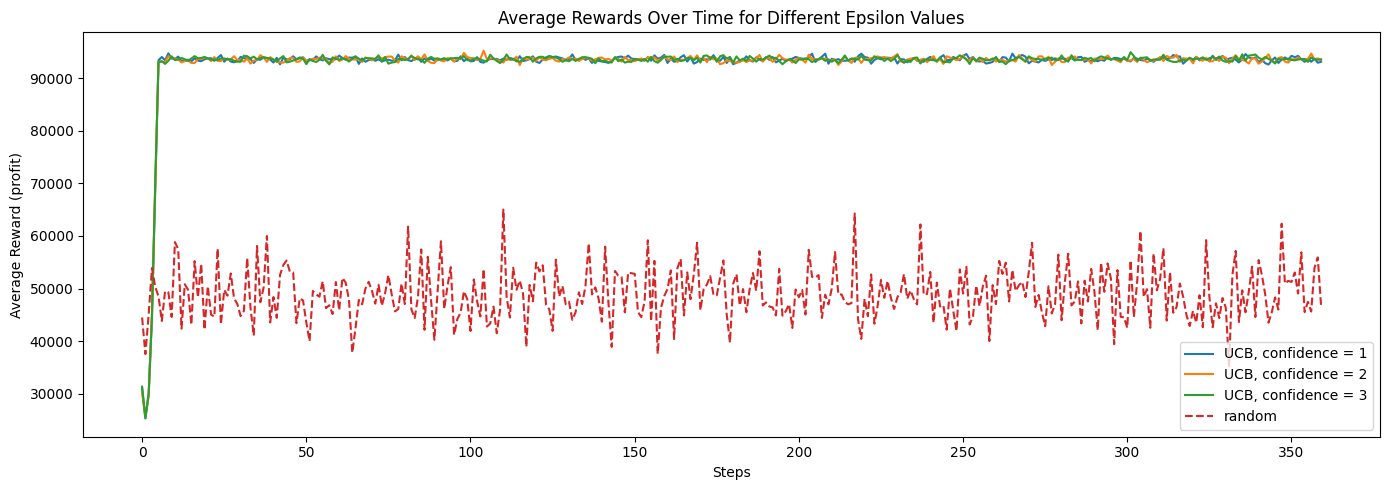

In [6]:
agents = pop_model.sample_without_discount(N=20000)

features = plot_average_rewards(pop_model, same_agents=True, agents=agents, \
                                n_days=360, confidences=[1, 2, 3], num_runs=30, \
                                discounts=[0.3, 0.4, 0.5, 0.6, 0.7, 0.8], \
                                reward='profit',
                                plot_path_file="plots/profits_ucb_360days_30-80_disc.jpg")

#### Features

In [7]:
features

[{'rewards_random': array([44477., 37513., 45052., 53903., 50274., 48530., 43817., 49501.,
         49266., 44579., 58839., 57495., 42359., 50811., 49741., 43108.,
         55215., 48317., 54691., 42161., 50452., 45026., 44633., 57600.,
         43166., 49729., 48635., 52853., 48138., 47047., 44754., 45746.,
         55819., 46374., 41023., 58109., 47379., 50178., 60001., 43545.,
         48363., 44417., 52588., 54465., 55327., 53200., 53049., 43403.,
         48118., 47736., 43561., 39966., 49525., 48883., 48442., 51374.,
         46255., 46811., 45146., 51225., 45846., 52019., 51109., 47817.,
         37779., 42526., 47812., 46988., 49966., 51263., 49547., 47115.,
         50713., 46730., 49126., 52545., 48897., 45640., 46087., 50938.,
         47042., 61784., 46049., 44379., 48339., 57443., 42138., 56031.,
         47665., 40233., 49721., 58999., 46125., 50495., 54072., 41164.,
         44194., 45421., 49475., 47989., 41915., 51720., 47599., 44680.,
         53714., 42762., 43316., 

### Epsilon-Greedy + UCB - maximize profit 100 days, discount=30-80%

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:22<00:00,  1.36it/s]


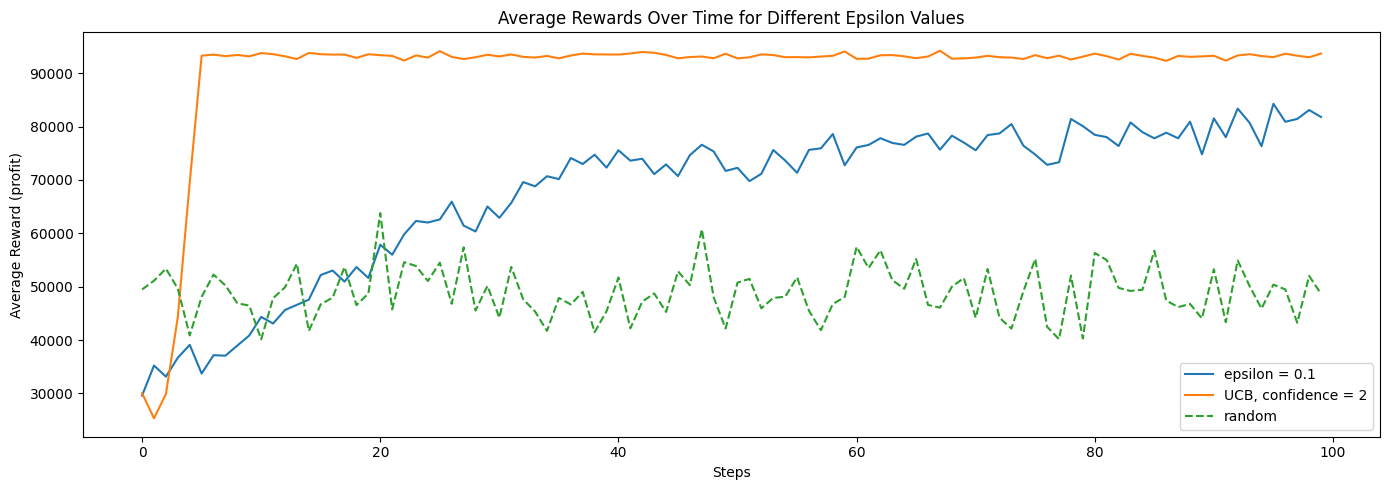

In [8]:
agents = pop_model.sample_without_discount(N=20000)

features = plot_average_rewards(pop_model, same_agents=True, agents=agents, \
                                n_days=100, epsilons=[0.1], confidences=[2], num_runs=30, \
                                discounts=[0.3, 0.4, 0.5, 0.6, 0.7, 0.8], \
                                reward='profit',
                                plot_path_file="plots/profit_eps_ucb_360days_30-80_disc.png")

#### Features

In [9]:
features

[{'rewards_random': array([49481., 51119., 53384., 49626., 40878., 48103., 52262., 50231.,
         46886., 46463., 40138., 47855., 49883., 54315., 41696., 46697.,
         47956., 53680., 46546., 48721., 63773., 45749., 54591., 53880.,
         51062., 54505., 46805., 57375., 45538., 50147., 44198., 53701.,
         47654., 45342., 41724., 47894., 46670., 49031., 41468., 45413.,
         51719., 42194., 47203., 48738., 45268., 52887., 50291., 60751.,
         47996., 42166., 50768., 51469., 45954., 47909., 48116., 51745.,
         45486., 41859., 46760., 48070., 57464., 53499., 56825., 51225.,
         49608., 55184., 46573., 46079., 49990., 51631., 44160., 53310.,
         44188., 42148., 49118., 55191., 42481., 40161., 52076., 40289.,
         56314., 54998., 49783., 49203., 49418., 56730., 47418., 46178.,
         46770., 44058., 53272., 43337., 54933., 50124., 45901., 50388.,
         49487., 43248., 52024., 48649.]),
  'values_random': array([29743.45158014, 25279.39289485, 29661

### Epsilon-Greedy + UCB - maximize profit 100 days, discount=0-100%

100%|██████████| 30/30 [00:24<00:00,  1.20it/s]


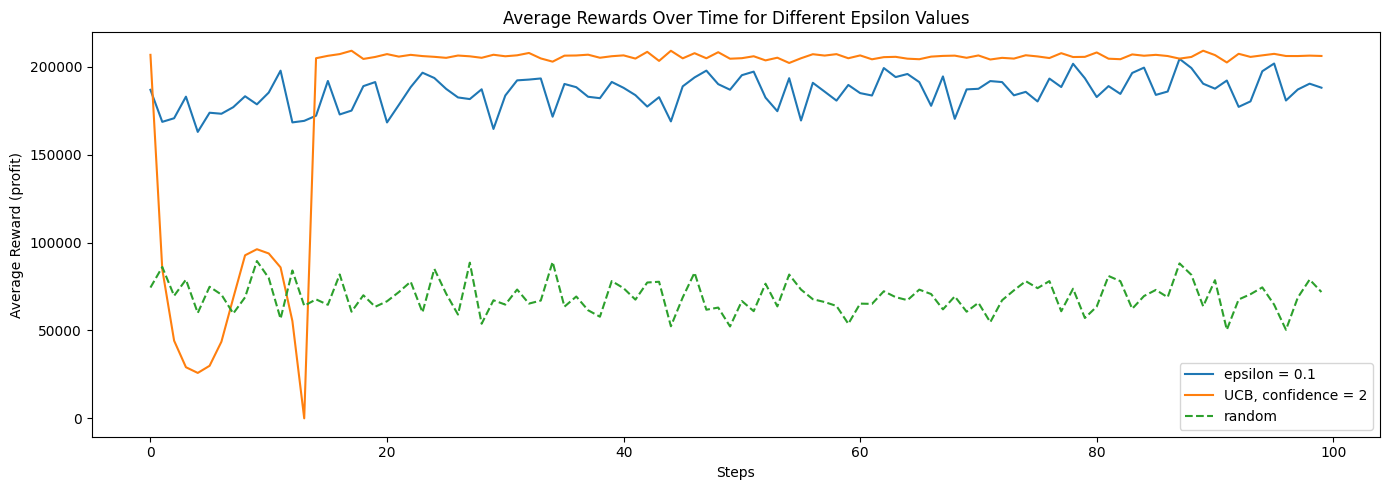

In [17]:
agents = pop_model.sample_without_discount(N=20000)

features = plot_average_rewards(pop_model, same_agents=True, agents=agents, \
                                n_days=100, epsilons=[0.1], confidences=[2], num_runs=30, \
                                discounts=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.87, 0.9, 0.95, 1], \
                                reward='profit',
                                plot_path_file="plots/profit_eps_ucb_100days_0-100_disc.png")

#### Features

In [11]:
features

[{'rewards_random': array([55376.5, 73093.5, 69884.5, 64118.5, 67571. , 58247.4, 73802.2,
         60767.5, 62461.2, 76923. , 80489.1, 65029.2, 88385. , 55130.3,
         72484.3, 67231.6, 65635. , 63120.6, 77158.6, 79466.8, 76661.4,
         75638. , 69320.3, 67498.3, 66314.7, 72021.6, 65061.7, 66442.1,
         76398.3, 69838. , 74634.4, 61068.4, 75022.8, 75657.5, 78196.5,
         74317.5, 57810.8, 73634.5, 56965.9, 71463.5, 58991.9, 52966.4,
         65467. , 77603.9, 77616.4, 71865.6, 75041.7, 65441.2, 62500.4,
         62045.3, 65006.3, 61960.9, 75461.1, 75673.9, 73351.2, 57000.9,
         78992.9, 76176.8, 83641.4, 63236.9, 71725.6, 53467.7, 64542.3,
         63956.4, 64876.6, 72271.7, 75719.2, 85367.5, 57075.8, 59751.3,
         75491.4, 60233.5, 66585.8, 77428. , 61974.2, 76431. , 84641.8,
         71660.6, 90219.5, 71003.4, 60367.6, 67464.3, 66252.1, 71221.1,
         78552.8, 64047.9, 88937.5, 64985. , 73784.1, 65063.6, 64882.3,
         64687.6, 71210.4, 81010.6, 53493.4, 8

### Epsilon-Greedy + UCB - maximize orders 100 days, discount=0-100%

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:21<00:00,  1.37it/s]


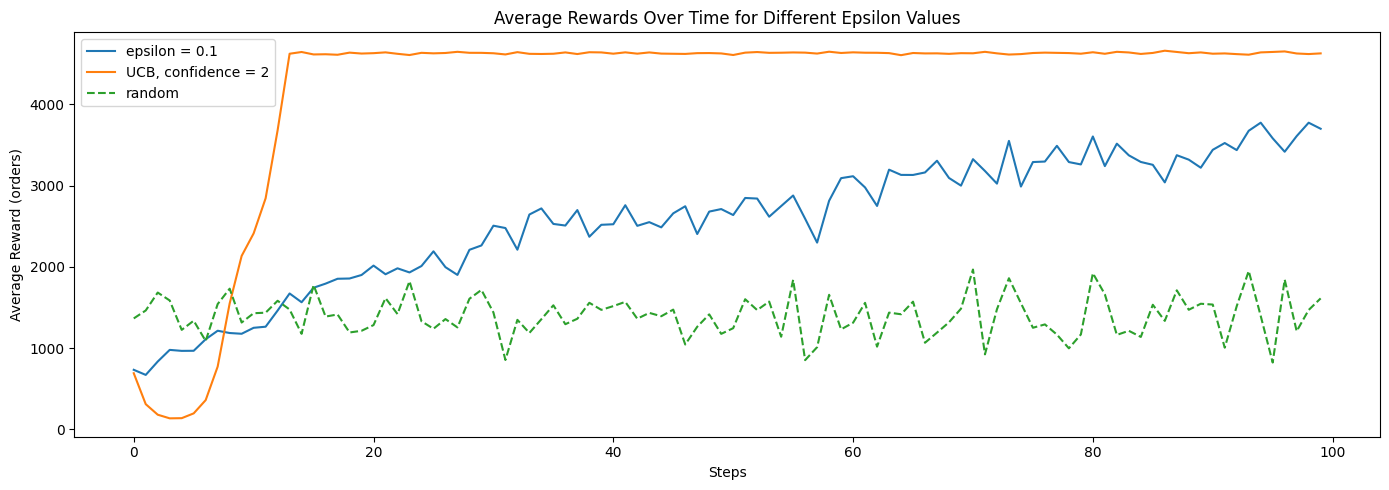

In [18]:
agents = pop_model.sample_without_discount(N=20000)

features = plot_average_rewards(pop_model, same_agents=True, agents=agents, \
                                n_days=100, epsilons=[0.1], confidences=[2], num_runs=30, \
                                discounts=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.87, 0.9, 0.95, 1], \
                                reward='orders',
                                plot_path_file="plots/orders_eps_ucb_100days_0-100_disc.png")

#### Features

In [13]:
features

[{'rewards_random': array([1428.13333333, 1201.36666667, 1344.23333333, 1067.6       ,
         1643.83333333, 1442.93333333, 1497.26666667, 1309.93333333,
         1497.63333333, 1149.7       ,  964.13333333, 1263.86666667,
         1792.9       , 1310.06666667, 1356.33333333, 1335.3       ,
         1469.8       , 1206.56666667, 1629.03333333, 1969.9       ,
         1428.96666667,  908.43333333, 1387.7       , 1571.53333333,
         1217.23333333, 1259.93333333, 1398.53333333, 1571.1       ,
         1426.63333333, 1604.2       ,  971.23333333, 1332.46666667,
         1400.96666667, 1296.16666667, 1357.16666667, 1677.16666667,
         2187.63333333, 1498.8       , 1256.9       , 1425.76666667,
         1243.5       , 1307.93333333, 1489.96666667, 1507.6       ,
         1575.4       , 1084.56666667, 1045.83333333, 1643.66666667,
         1260.56666667, 1905.53333333, 1201.        , 1488.8       ,
         1843.26666667, 1338.16666667, 1212.93333333, 1516.56666667,
         1153.6 

### Epsilon-Greedy + UCB - maximize rate 100 days, discount=0-100%

100%|██████████| 30/30 [00:19<00:00,  1.55it/s]


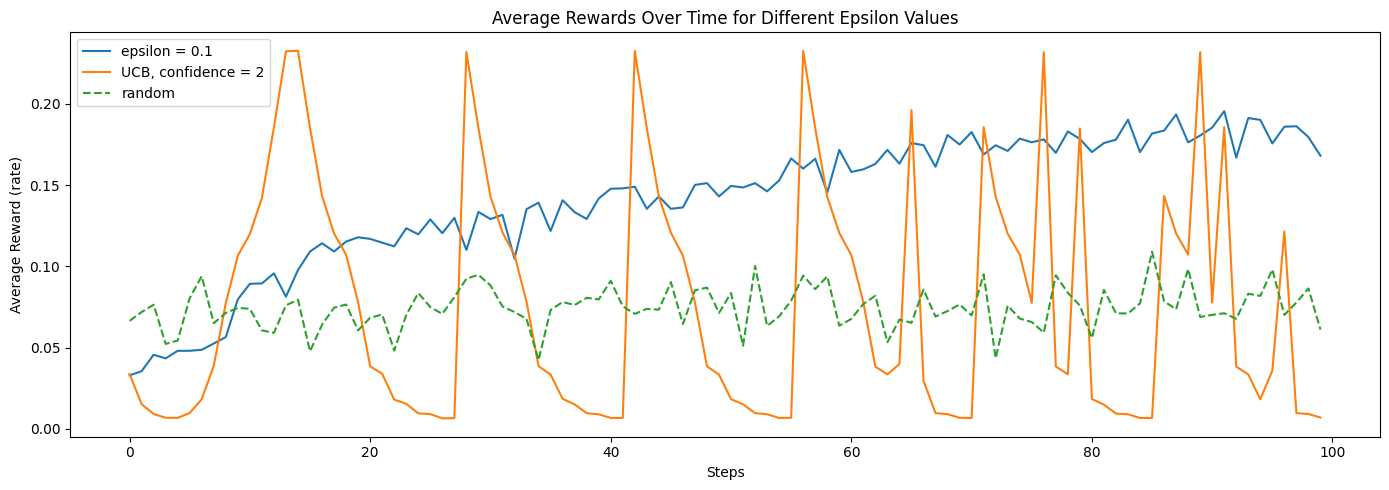

In [19]:
agents = pop_model.sample_without_discount(N=20000)

features = plot_average_rewards(pop_model, same_agents=True, agents=agents, \
                                n_days=100, epsilons=[0.1], confidences=[2], num_runs=30, \
                                discounts=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.87, 0.9, 0.95, 1], \
                                reward='rate',
                                plot_path_file="plots/rate_eps_ucb_100days_0-100_disc.png")

#### Features

In [16]:
features

[{'rewards_random': array([0.09287333, 0.06635333, 0.08743333, 0.06144333, 0.099045  ,
         0.07104   , 0.08160167, 0.05574167, 0.07433333, 0.07550833,
         0.05794333, 0.08858667, 0.07083667, 0.082815  , 0.06201833,
         0.07660167, 0.07367333, 0.07235167, 0.04841333, 0.065215  ,
         0.07774667, 0.08618833, 0.08292833, 0.060355  , 0.09545667,
         0.075265  , 0.08166333, 0.05913833, 0.08688333, 0.07008333,
         0.07146833, 0.05130333, 0.071875  , 0.090595  , 0.08490333,
         0.07647167, 0.05822   , 0.07841333, 0.05623667, 0.0581    ,
         0.052935  , 0.06731   , 0.07381667, 0.07947167, 0.08572   ,
         0.048655  , 0.07937   , 0.05558333, 0.06828667, 0.06245833,
         0.07218   , 0.07760667, 0.08443833, 0.066275  , 0.07407333,
         0.08769667, 0.07630333, 0.05906167, 0.06255833, 0.05516333,
         0.068245  , 0.06707667, 0.058555  , 0.07452   , 0.05851833,
         0.05175167, 0.08326667, 0.08048833, 0.067435  , 0.05521333,
         0.06050